In [1]:
# Loading libraries

import xarray as xr
import matplotlib.pyplot as plt
import glob
import numpy as np
from matplotlib import gridspec
from mpl_toolkits.axes_grid1 import ImageGrid
import pylab
import matplotlib
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
data_control = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/control_20yr.nc')
data_pole_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_90_n_20yr.nc')
data_85_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_85_n_20yr.nc')
data_80_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_80_n_20yr.nc')
data_75_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_75_n_20yr.nc')
data_70_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_70_n_20yr.nc')
data_65_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_65_n_20yr.nc')
data_60_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_60_n_20yr.nc')
data_55_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_55_n_20yr.nc')
data_50_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_50_n_20yr.nc')
data_45_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_45_n_20yr.nc')
data_40_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_40_n_20yr.nc')
data_35_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_35_n_20yr.nc')
data_30_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_30_n_20yr.nc')
data_25_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_25_n_20yr.nc')
data_20_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_20_n_20yr.nc')
data_15_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_15_n_20yr.nc')
data_10_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_10_n_20yr.nc')
data_05_n = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_05_n_20yr.nc')
data_00 = xr.open_dataset('/data/keeling/a/mailes2/a/processed_aquap_data/perturb_00_20yr.nc')

# Radiation global average calculation

In [3]:
# Weights

weights = np.cos(np.deg2rad(data_control.lat))
weights.name='weights'
weights

<xarray.DataArray 'weights' (lat: 96)>
array([6.12323400e-17, 3.30633693e-02, 6.60905843e-02, 9.90455303e-02,
       1.31892171e-01, 1.64594590e-01, 1.97117027e-01, 2.29423920e-01,
       2.61479941e-01, 2.93250037e-01, 3.24699469e-01, 3.55793847e-01,
       3.86499169e-01, 4.16781860e-01, 4.46608807e-01, 4.75947393e-01,
       5.04765538e-01, 5.33031729e-01, 5.60715057e-01, 5.87785252e-01,
       6.14212713e-01, 6.39968541e-01, 6.65024572e-01, 6.89353409e-01,
       7.12928448e-01, 7.35723911e-01, 7.57714870e-01, 7.78877279e-01,
       7.99187997e-01, 8.18624815e-01, 8.37166478e-01, 8.54792713e-01,
       8.71484244e-01, 8.87222819e-01, 9.01991230e-01, 9.15773327e-01,
       9.28554038e-01, 9.40319390e-01, 9.51056516e-01, 9.60753676e-01,
       9.69400266e-01, 9.76986831e-01, 9.83505075e-01, 9.88947871e-01,
       9.93309266e-01, 9.96584493e-01, 9.98769969e-01, 9.99863305e-01,
       9.99863305e-01, 9.98769969e-01, 9.96584493e-01, 9.93309266e-01,
       9.88947871e-01, 9.83505075e-01, 9.76986831e-01, 9.69400266e-01,
       9.60753676e-01, 9.51056516e-01, 9.40319390e-01, 9.28554038e-01,
       9.15773327e-01, 9.01991230e-01, 8.87222819e-01, 8.71484244e-01,
       8.54792713e-01, 8.37166478e-01, 8.18624815e-01, 7.99187997e-01,
       7.78877279e-01, 7.57714870e-01, 7.35723911e-01, 7.12928448e-01,
       6.89353409e-01, 6.65024572e-01, 6.39968541e-01, 6.14212713e-01,
       5.87785252e-01, 5.60715057e-01, 5.33031729e-01, 5.04765538e-01,
       4.75947393e-01, 4.46608807e-01, 4.16781860e-01, 3.86499169e-01,
       3.55793847e-01, 3.24699469e-01, 2.93250037e-01, 2.61479941e-01,
       2.29423920e-01, 1.97117027e-01, 1.64594590e-01, 1.31892171e-01,
       9.90455303e-02, 6.60905843e-02, 3.30633693e-02, 6.12323400e-17])
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0
Attributes:
    long_name:  latitude
    units:      degrees_north

In [4]:
# All Sky

#Control
control_Lw = data_control.FLNT.weighted(weights)
control_Rw = control_Lw.mean(('lat','lon'))
control_Rw.load()

#Equator
data_00_Lw = data_00.FLNT.weighted(weights)
data_00_Rw = data_00_Lw.mean(('lat','lon'))
data_00_Rw.load()

#5 deg
data_05_Lw = data_05_n.FLNT.weighted(weights)
data_05_Rw = data_05_Lw.mean(('lat','lon'))
data_05_Rw.load()

#10 deg
data_10_Lw = data_10_n.FLNT.weighted(weights)
data_10_Rw = data_10_Lw.mean(('lat','lon'))
data_10_Rw.load()

#15 deg
data_15_Lw = data_15_n.FLNT.weighted(weights)
data_15_Rw = data_15_Lw.mean(('lat','lon'))
data_15_Rw.load()

#20 deg
data_20_Lw = data_20_n.FLNT.weighted(weights)
data_20_Rw = data_20_Lw.mean(('lat','lon'))
data_20_Rw.load()

#25 deg
data_25_Lw = data_25_n.FLNT.weighted(weights)
data_25_Rw = data_25_Lw.mean(('lat','lon'))
data_25_Rw.load()

#30 deg
data_30_Lw = data_30_n.FLNT.weighted(weights)
data_30_Rw = data_30_Lw.mean(('lat','lon'))
data_30_Rw.load()

#35 deg
data_35_Lw = data_35_n.FLNT.weighted(weights)
data_35_Rw = data_35_Lw.mean(('lat','lon'))
data_35_Rw.load()

#40 deg
data_40_Lw = data_40_n.FLNT.weighted(weights)
data_40_Rw = data_40_Lw.mean(('lat','lon'))
data_40_Rw.load()

#45 deg
data_45_Lw = data_45_n.FLNT.weighted(weights)
data_45_Rw = data_45_Lw.mean(('lat','lon'))
data_45_Rw.load()

#50 deg
data_50_Lw = data_50_n.FLNT.weighted(weights)
data_50_Rw = data_50_Lw.mean(('lat','lon'))
data_50_Rw.load()

#55 deg
data_55_Lw = data_55_n.FLNT.weighted(weights)
data_55_Rw = data_55_Lw.mean(('lat','lon'))
data_55_Rw.load()

#60 deg
data_60_Lw = data_60_n.FLNT.weighted(weights)
data_60_Rw = data_60_Lw.mean(('lat','lon'))
data_60_Rw.load()

#65 deg
data_65_Lw = data_65_n.FLNT.weighted(weights)
data_65_Rw = data_65_Lw.mean(('lat','lon'))

#70 deg
data_70_Lw = data_70_n.FLNT.weighted(weights)
data_70_Rw = data_70_Lw.mean(('lat','lon'))

#75 deg
data_75_Lw = data_75_n.FLNT.weighted(weights)
data_75_Rw = data_75_Lw.mean(('lat','lon'))
data_75_Rw.load()

#80 deg
data_80_Lw = data_80_n.FLNT.weighted(weights)
data_80_Rw = data_80_Lw.mean(('lat','lon'))
data_80_Rw.load()

#85 deg
data_85_Lw = data_85_n.FLNT.weighted(weights)
data_85_Rw = data_85_Lw.mean(('lat','lon'))
data_85_Rw.load()

#90 deg
data_pole_Lw = data_pole_n.FLNT.weighted(weights)
data_pole_Rw = data_pole_Lw.mean(('lat','lon'))
data_pole_Rw.load()

Rw = [data_00_Rw, data_05_Rw, data_10_Rw, data_15_Rw, data_20_Rw, data_25_Rw, data_30_Rw, data_35_Rw,
      data_40_Rw, data_45_Rw, data_50_Rw, data_55_Rw, data_60_Rw, data_65_Rw, data_70_Rw, data_75_Rw,
      data_80_Rw, data_85_Rw, data_pole_Rw]

In [5]:
#Difference in TOA radiation response

data_00_dRw = data_00_Rw - control_Rw
data_05_dRw = data_05_Rw - control_Rw
data_10_dRw = data_10_Rw - control_Rw
data_15_dRw = data_15_Rw - control_Rw
data_20_dRw = data_20_Rw - control_Rw
data_25_dRw = data_25_Rw - control_Rw
data_30_dRw = data_30_Rw - control_Rw
data_35_dRw = data_35_Rw - control_Rw
data_40_dRw = data_40_Rw - control_Rw
data_45_dRw = data_45_Rw - control_Rw
data_50_dRw = data_50_Rw - control_Rw
data_55_dRw = data_55_Rw - control_Rw
data_60_dRw = data_60_Rw - control_Rw
data_65_dRw = data_65_Rw - control_Rw
data_70_dRw = data_70_Rw - control_Rw
data_75_dRw = data_75_Rw - control_Rw
data_80_dRw = data_80_Rw - control_Rw
data_85_dRw = data_85_Rw - control_Rw
data_pole_dRw = data_pole_Rw - control_Rw

dRw = [data_00_dRw, data_05_dRw, data_10_dRw, data_15_dRw, data_20_dRw, data_25_dRw, data_30_dRw, 
       data_35_dRw, data_40_dRw, data_45_dRw, data_50_dRw, data_55_dRw, data_60_dRw, data_65_dRw, 
       data_70_dRw, data_75_dRw, data_80_dRw, data_85_dRw, data_pole_dRw]

In [6]:
# Clear Sky

# Control
control_clr = data_control.FLNTC.weighted(weights).mean(('lat','lon'))
control_clr.load()

# Equator
clr_00 =  data_00.FLNTC.weighted(weights).mean(('lat','lon')) - control_clr
clr_00.load()

# 5 deg.
clr_05 =  data_05_n.FLNTC.weighted(weights).mean(('lat','lon')) - control_clr
clr_05.load()

# 10 deg.
clr_10 =  data_10_n.FLNTC.weighted(weights).mean(('lat','lon')) - control_clr
clr_10.load()

# 15 deg.
clr_15 =  data_15_n.FLNTC.weighted(weights).mean(('lat','lon')) - control_clr
clr_15.load()

# 20 deg.
clr_20 =  data_20_n.FLNTC.weighted(weights).mean(('lat','lon')) - control_clr
clr_20.load()

# 25 deg.
clr_25 = data_25_n.FLNTC.weighted(weights).mean(('lat','lon')) - control_clr
clr_25.load()

# 30 deg.
clr_30 =  data_30_n.FLNTC.weighted(weights).mean(('lat','lon')) - control_clr
clr_30.load()

# 35 deg.
clr_35 =  data_35_n.FLNTC.weighted(weights).mean(('lat','lon')) - control_clr
clr_35.load()

# 40 deg.
clr_40 =  data_40_n.FLNTC.weighted(weights).mean(('lat','lon')) - control_clr
clr_40.load()

# 45 deg.
clr_45 =  data_45_n.FLNTC.weighted(weights).mean(('lat','lon')) - control_clr
clr_45.load()

# 50 deg.
clr_50 =  data_50_n.FLNTC.weighted(weights).mean(('lat','lon')) - control_clr
clr_50.load()

# 55 deg.
clr_55 =  data_55_n.FLNTC.weighted(weights).mean(('lat','lon')) - control_clr
clr_55.load()

# 60 deg.
clr_60 =  data_60_n.FLNTC.weighted(weights).mean(('lat','lon')) - control_clr
clr_60.load()

# 65 deg.
clr_65 =  data_65_n.FLNTC.weighted(weights).mean(('lat','lon')) - control_clr
clr_65.load()

# 70 deg.
clr_70 =  data_70_n.FLNTC.weighted(weights).mean(('lat','lon')) - control_clr
clr_70.load()

# 75 deg.
clr_75 =  data_75_n.FLNTC.weighted(weights).mean(('lat','lon')) - control_clr
clr_75.load()

# 80 deg.
clr_80 =  data_80_n.FLNTC.weighted(weights).mean(('lat','lon')) - control_clr
clr_80.load()

# 85 deg.
clr_85 =  data_85_n.FLNTC.weighted(weights).mean(('lat','lon')) - control_clr
clr_85.load()

# 90 deg.
clr_90 =  data_pole_n.FLNTC.weighted(weights).mean(('lat','lon')) - control_clr
clr_90.load()

<xarray.DataArray 'FLNTC' ()>
array(0.04057208)

In [7]:
clr_list = [clr_00, clr_05, clr_10, clr_15, clr_20, clr_25, clr_30, clr_35, clr_40, clr_45, clr_50, clr_55, clr_60, 
            clr_65, clr_70, clr_75, clr_80, clr_85, clr_90]

In [8]:
# Cloud Radiative Effect

cre_00 = data_00_dRw - clr_00
cre_05 = data_05_dRw - clr_05
cre_10 = data_10_dRw - clr_10
cre_15 = data_15_dRw - clr_15
cre_20 = data_20_dRw - clr_20
cre_25 = data_25_dRw - clr_25
cre_30 = data_30_dRw - clr_30
cre_35 = data_35_dRw - clr_35
cre_40 = data_40_dRw - clr_40
cre_45 = data_45_dRw - clr_45
cre_50 = data_50_dRw - clr_50
cre_55 = data_55_dRw - clr_55
cre_60 = data_60_dRw - clr_60
cre_65 = data_65_dRw - clr_65
cre_70 = data_70_dRw - clr_70
cre_75 = data_75_dRw - clr_75
cre_80 = data_80_dRw - clr_80
cre_85 = data_85_dRw - clr_85
cre_90 = data_pole_dRw - clr_90

cre_list = [cre_00, cre_05, cre_10, cre_15, cre_20, cre_25, cre_30, cre_35, cre_40, cre_45, cre_50, 
            cre_55, cre_60, cre_65, cre_70, cre_75, cre_80, cre_85, cre_90]

In [9]:
lats = [0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90]

# Color Mesh Plot Calculation

In [10]:
mesh_control =  data_control.FLNT.mean('lon')
mesh_control

mesh_00 = data_00.FLNT.mean('lon') - mesh_control
mesh_00.load()
mesh_05 =  data_05_n.FLNT.mean('lon') - mesh_control
mesh_05.load()
mesh_10 =  data_10_n.FLNT.mean('lon') - mesh_control
mesh_10.load()
mesh_15 =  data_15_n.FLNT.mean('lon') - mesh_control
mesh_15.load()
mesh_20 =  data_20_n.FLNT.mean('lon') - mesh_control
mesh_20.load()
mesh_25 =  data_25_n.FLNT.mean('lon') - mesh_control
mesh_25.load()
mesh_30 =  data_30_n.FLNT.mean('lon') - mesh_control
mesh_30.load()
mesh_35 =  data_35_n.FLNT.mean('lon') - mesh_control
mesh_35.load()
mesh_40 =  data_40_n.FLNT.mean('lon') - mesh_control
mesh_40.load()
mesh_45 =  data_45_n.FLNT.mean('lon') - mesh_control
mesh_45.load()
mesh_50 =  data_50_n.FLNT.mean('lon') - mesh_control
mesh_50.load()
mesh_55 =  data_55_n.FLNT.mean('lon') - mesh_control
mesh_55.load()
mesh_60 =  data_60_n.FLNT.mean('lon') - mesh_control
mesh_60.load()
mesh_65 =  data_65_n.FLNT.mean('lon') - mesh_control
mesh_65.load()
mesh_70 =  data_70_n.FLNT.mean('lon') - mesh_control
mesh_70.load()
mesh_75 =  data_75_n.FLNT.mean('lon') - mesh_control
mesh_75.load()
mesh_80 =  data_80_n.FLNT.mean('lon') - mesh_control
mesh_80.load()
mesh_85 =  data_85_n.FLNT.mean('lon') - mesh_control
mesh_85.load()
mesh_90 =  data_pole_n.FLNT.mean('lon') - mesh_control
mesh_90.load()

<xarray.DataArray 'FLNT' (lat: 96)>
array([-1.2637329e-01,  2.2720337e-02, -1.6784668e-03,  3.9184570e-02,
        1.2725830e-01,  1.4909363e-01,  1.3903809e-01,  1.0508728e-01,
        1.5158081e-01,  1.7097473e-01,  1.8356323e-01,  1.8182373e-01,
        1.9880676e-01,  1.6889954e-01,  1.2438965e-01,  1.3536072e-01,
        1.5524292e-01,  1.5788269e-01,  1.7089844e-01,  1.6403198e-01,
        1.6189575e-01,  2.0228577e-01,  2.3942566e-01,  2.0420837e-01,
        1.2120056e-01,  1.0787964e-01,  5.7479858e-02, -2.7709961e-02,
       -9.7885132e-02, -1.1817932e-01, -1.4587402e-01, -1.3351440e-01,
       -1.4669800e-01, -2.0413208e-01, -2.2637939e-01, -2.2157288e-01,
       -2.2189331e-01, -2.3510742e-01, -2.0278931e-01, -1.5631104e-01,
       -7.3303223e-02,  5.9478760e-02,  2.2717285e-01,  4.0780640e-01,
        6.1053467e-01,  6.2783813e-01,  1.2420654e-01, -2.9742432e-01,
       -5.6785583e-01, -3.9537048e-01,  2.2175598e-01,  3.1199646e-01,
        2.5866699e-01,  2.1496582e-01,  2.0999146e-01,  2.0288086e-01,
        2.2396851e-01,  2.5927734e-01,  2.8668213e-01,  2.8479004e-01,
        1.5353394e-01,  6.9046021e-02,  7.4493408e-02,  1.2075806e-01,
        8.9630127e-02,  1.1355591e-01,  1.6754150e-01,  1.7117310e-01,
        1.5567017e-01,  6.2255859e-02,  7.6446533e-03,  2.0355225e-02,
        4.1717529e-02,  6.0256958e-02,  7.0632935e-02,  7.9483032e-02,
        4.0374756e-02,  6.9732666e-03,  2.2186279e-02,  4.2190552e-02,
        8.2427979e-02,  6.4971924e-02,  7.0831299e-02,  9.1278076e-02,
        1.4628601e-01,  1.9723511e-01,  2.7790833e-01,  4.5245361e-01,
        8.2626343e-01,  1.3891449e+00,  1.9845428e+00,  1.5775452e+00,
        2.2247314e-01, -1.4491577e+00, -2.7673798e+00, -3.6989746e+00],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0

In [11]:
x_dim_mesh = np.linspace(0,1,96)

xdim_00, toamesh_00 = np.meshgrid(x_dim_mesh, mesh_00)
xdim_05, toamesh_05 = np.meshgrid(x_dim_mesh, mesh_05)
xdim_10, toamesh_10 = np.meshgrid(x_dim_mesh, mesh_10)
xdim_15, toamesh_15 = np.meshgrid(x_dim_mesh, mesh_15)
xdim_20, toamesh_20 = np.meshgrid(x_dim_mesh, mesh_20)
xdim_25, toamesh_25 = np.meshgrid(x_dim_mesh, mesh_25)
xdim_30, toamesh_30 = np.meshgrid(x_dim_mesh, mesh_30)
xdim_35, toamesh_35 = np.meshgrid(x_dim_mesh, mesh_35)
xdim_40, toamesh_40 = np.meshgrid(x_dim_mesh, mesh_40)
xdim_45, toamesh_45 = np.meshgrid(x_dim_mesh, mesh_45)
xdim_50, toamesh_50 = np.meshgrid(x_dim_mesh, mesh_50)
xdim_55, toamesh_55 = np.meshgrid(x_dim_mesh, mesh_55)
xdim_60, toamesh_60 = np.meshgrid(x_dim_mesh, mesh_60)
xdim_65, toamesh_65 = np.meshgrid(x_dim_mesh, mesh_65)
xdim_70, toamesh_70 = np.meshgrid(x_dim_mesh, mesh_70)
xdim_75, toamesh_75 = np.meshgrid(x_dim_mesh, mesh_75)
xdim_80, toamesh_80 = np.meshgrid(x_dim_mesh, mesh_80)
xdim_85, toamesh_85 = np.meshgrid(x_dim_mesh, mesh_85)
xdim_90, toamesh_90 = np.meshgrid(x_dim_mesh, mesh_90)

In [12]:
xdim_toa = [xdim_00, xdim_05, xdim_10, xdim_15, xdim_20, xdim_25, xdim_30, xdim_35, xdim_40, xdim_45, xdim_50, xdim_55,
            xdim_60, xdim_65, xdim_70, xdim_75, xdim_80, xdim_85, xdim_90]
mesh_toa = [toamesh_00, toamesh_05, toamesh_10, toamesh_15, toamesh_20, toamesh_25, toamesh_30, toamesh_35, toamesh_40,
            toamesh_45, toamesh_50, toamesh_55, toamesh_60, toamesh_65, toamesh_70, toamesh_75, toamesh_80, toamesh_85,
            toamesh_90]

In [27]:
mesh_clr_control =  data_control.FLNTC.mean('lon')
mesh_clr_control.load()

mesh_clr_00 =  data_00.FLNTC.mean('lon') - mesh_clr_control
mesh_clr_00.load()
mesh_clr_05 =  data_05_n.FLNTC.mean('lon') - mesh_clr_control
mesh_clr_05.load()
mesh_clr_10 =  data_10_n.FLNTC.mean('lon') - mesh_clr_control
mesh_clr_10.load()
mesh_clr_15 =  data_15_n.FLNTC.mean('lon') - mesh_clr_control
mesh_clr_15.load()
mesh_clr_20 =  data_20_n.FLNTC.mean('lon') - mesh_clr_control
mesh_clr_20.load()
mesh_clr_25 =  data_25_n.FLNTC.mean('lon') - mesh_clr_control
mesh_clr_25.load()
mesh_clr_30 =  data_30_n.FLNTC.mean('lon') - mesh_clr_control
mesh_clr_30.load()
mesh_clr_35 =  data_35_n.FLNTC.mean('lon') - mesh_clr_control
mesh_clr_35.load()
mesh_clr_40 =  data_40_n.FLNTC.mean('lon') - mesh_clr_control
mesh_clr_40.load()
mesh_clr_45 =  data_45_n.FLNTC.mean('lon') - mesh_clr_control
mesh_clr_45.load()
mesh_clr_50 =  data_50_n.FLNTC.mean('lon') - mesh_clr_control
mesh_clr_50.load()
mesh_clr_55 =   data_55_n.FLNTC.mean('lon') - mesh_clr_control
mesh_clr_55.load()
mesh_clr_60 =   data_60_n.FLNTC.mean('lon') - mesh_clr_control
mesh_clr_60.load()
mesh_clr_65 =  data_65_n.FLNTC.mean('lon') - mesh_clr_control
mesh_clr_65.load()
mesh_clr_70 =   data_70_n.FLNTC.mean('lon') - mesh_clr_control
mesh_clr_70.load()
mesh_clr_75 =   data_75_n.FLNTC.mean('lon') - mesh_clr_control
mesh_clr_75.load()
mesh_clr_80 =   data_80_n.FLNTC.mean('lon') - mesh_clr_control
mesh_clr_80.load()
mesh_clr_85 =   data_85_n.FLNTC.mean('lon') - mesh_clr_control
mesh_clr_85.load()
mesh_clr_90 =   data_pole_n.FLNTC.mean('lon') - mesh_clr_control
mesh_clr_90.load()

<xarray.DataArray 'FLNTC' (lat: 96)>
array([ 3.57513428e-02,  3.72161865e-02,  5.76477051e-02,  6.97631836e-02,
        8.22448730e-02,  8.80889893e-02,  9.01184082e-02,  8.85620117e-02,
        9.19799805e-02,  8.98132324e-02,  9.54895020e-02,  1.09466553e-01,
        1.25015259e-01,  1.28555298e-01,  1.23809814e-01,  1.25442505e-01,
        1.24603271e-01,  1.12289429e-01,  1.00952148e-01,  9.48028564e-02,
        9.73663330e-02,  9.98687744e-02,  8.91723633e-02,  6.96716309e-02,
        5.79376221e-02,  4.93469238e-02,  3.36914062e-02,  1.47552490e-02,
       -4.86755371e-03, -1.69219971e-02, -2.45971680e-02, -3.71551514e-02,
       -5.33599854e-02, -7.34252930e-02, -9.42382812e-02, -1.15478516e-01,
       -1.39251709e-01, -1.60095215e-01, -1.60919189e-01, -1.35528564e-01,
       -8.36791992e-02,  7.78198242e-03,  1.28112793e-01,  2.18627930e-01,
        2.30163574e-01,  1.46270752e-01,  3.43627930e-02, -2.19116211e-02,
       -5.96313477e-02, -6.19812012e-02, -4.88281250e-04,  7.05871582e-02,
        1.09283447e-01,  1.22070312e-01,  1.21582031e-01,  1.16210938e-01,
        1.19232178e-01,  1.16912842e-01,  1.09375000e-01,  9.41467285e-02,
        7.68432617e-02,  7.14721680e-02,  7.39746094e-02,  7.04650879e-02,
        4.88281250e-02,  1.99127197e-02,  1.70898438e-03, -2.65502930e-03,
       -8.19396973e-03, -1.54571533e-02, -1.76849365e-02, -8.10241699e-03,
        2.10571289e-03,  3.35693359e-03,  4.02832031e-03,  1.28173828e-03,
       -9.06372070e-03, -1.28784180e-02, -4.94384766e-03,  6.71386719e-04,
        8.97216797e-03,  1.30767822e-02,  1.52282715e-02,  1.73339844e-02,
        1.78985596e-02,  1.94549561e-02,  2.34680176e-02,  3.35540771e-02,
        5.67474365e-02,  8.90808105e-02,  1.67404175e-01,  6.73065186e-01,
        1.58198547e+00,  2.62367249e+00,  3.42422485e+00,  3.74232483e+00],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 84.32 86.21 88.11 90.0

In [28]:
xdimclr_00, clrmesh_00 = np.meshgrid(x_dim_mesh, mesh_clr_00)
xdimclr_05, clrmesh_05 = np.meshgrid(x_dim_mesh, mesh_clr_05)
xdimclr_10, clrmesh_10 = np.meshgrid(x_dim_mesh, mesh_clr_10)
xdimclr_15, clrmesh_15 = np.meshgrid(x_dim_mesh, mesh_clr_15)
xdimclr_20, clrmesh_20 = np.meshgrid(x_dim_mesh, mesh_clr_20)
xdimclr_25, clrmesh_25 = np.meshgrid(x_dim_mesh, mesh_clr_25)
xdimclr_30, clrmesh_30 = np.meshgrid(x_dim_mesh, mesh_clr_30)
xdimclr_35, clrmesh_35 = np.meshgrid(x_dim_mesh, mesh_clr_35)
xdimclr_40, clrmesh_40 = np.meshgrid(x_dim_mesh, mesh_clr_40)
xdimclr_45, clrmesh_45 = np.meshgrid(x_dim_mesh, mesh_clr_45)
xdimclr_50, clrmesh_50 = np.meshgrid(x_dim_mesh, mesh_clr_50)
xdimclr_55, clrmesh_55 = np.meshgrid(x_dim_mesh, mesh_clr_55)
xdimclr_60, clrmesh_60 = np.meshgrid(x_dim_mesh, mesh_clr_60)
xdimclr_65, clrmesh_65 = np.meshgrid(x_dim_mesh, mesh_clr_65)
xdimclr_70, clrmesh_70 = np.meshgrid(x_dim_mesh, mesh_clr_70)
xdimclr_75, clrmesh_75 = np.meshgrid(x_dim_mesh, mesh_clr_75)
xdimclr_80, clrmesh_80 = np.meshgrid(x_dim_mesh, mesh_clr_80)
xdimclr_85, clrmesh_85 = np.meshgrid(x_dim_mesh, mesh_clr_85)
xdimclr_90, clrmesh_90 = np.meshgrid(x_dim_mesh, mesh_clr_90)

xdimclr = [xdimclr_00, xdimclr_05, xdimclr_10, xdimclr_15, xdimclr_20, xdimclr_25, xdimclr_30, xdimclr_35, xdimclr_40,
           xdimclr_45, xdimclr_50, xdimclr_55, xdimclr_60, xdimclr_65, xdimclr_70, xdimclr_75, xdimclr_80, xdimclr_85,
           xdimclr_90]
clrmesh = [clrmesh_00, clrmesh_05, clrmesh_10, clrmesh_15, clrmesh_20, clrmesh_25, clrmesh_30, clrmesh_35, clrmesh_40,
           clrmesh_45, clrmesh_50, clrmesh_55, clrmesh_60, clrmesh_65, clrmesh_70, clrmesh_75, clrmesh_80, clrmesh_85,
           clrmesh_90]

In [29]:
mesh_cre_00 = mesh_00 - mesh_clr_00
mesh_cre_05 = mesh_05 - mesh_clr_05
mesh_cre_10 = mesh_10 - mesh_clr_10
mesh_cre_15 = mesh_15 - mesh_clr_15
mesh_cre_20 = mesh_20 - mesh_clr_20
mesh_cre_25 = mesh_25 - mesh_clr_25
mesh_cre_30 = mesh_30 - mesh_clr_30
mesh_cre_35 = mesh_35 - mesh_clr_35
mesh_cre_40 = mesh_40 - mesh_clr_40
mesh_cre_45 = mesh_45 - mesh_clr_45
mesh_cre_50 = mesh_50 - mesh_clr_50
mesh_cre_55 = mesh_55 - mesh_clr_55
mesh_cre_60 = mesh_60 - mesh_clr_60
mesh_cre_65 = mesh_65 - mesh_clr_65
mesh_cre_70 = mesh_70 - mesh_clr_70
mesh_cre_75 = mesh_75 - mesh_clr_75
mesh_cre_80 = mesh_80 - mesh_clr_80
mesh_cre_85 = mesh_85 - mesh_clr_85
mesh_cre_90 = mesh_90 - mesh_clr_90

In [30]:
xdimmesh_00, cremesh_00 = np.meshgrid(x_dim_mesh, mesh_cre_00)
xdimmesh_05, cremesh_05 = np.meshgrid(x_dim_mesh, mesh_cre_05)
xdimmesh_10, cremesh_10 = np.meshgrid(x_dim_mesh, mesh_cre_10)
xdimmesh_15, cremesh_15 = np.meshgrid(x_dim_mesh, mesh_cre_15)
xdimmesh_20, cremesh_20 = np.meshgrid(x_dim_mesh, mesh_cre_20)
xdimmesh_25, cremesh_25 = np.meshgrid(x_dim_mesh, mesh_cre_25)
xdimmesh_30, cremesh_30 = np.meshgrid(x_dim_mesh, mesh_cre_30)
xdimmesh_35, cremesh_35 = np.meshgrid(x_dim_mesh, mesh_cre_35)
xdimmesh_40, cremesh_40 = np.meshgrid(x_dim_mesh, mesh_cre_40)
xdimmesh_45, cremesh_45 = np.meshgrid(x_dim_mesh, mesh_cre_45)
xdimmesh_50, cremesh_50 = np.meshgrid(x_dim_mesh, mesh_cre_50)
xdimmesh_55, cremesh_55 = np.meshgrid(x_dim_mesh, mesh_cre_55)
xdimmesh_60, cremesh_60 = np.meshgrid(x_dim_mesh, mesh_cre_60)
xdimmesh_65, cremesh_65 = np.meshgrid(x_dim_mesh, mesh_cre_65)
xdimmesh_70, cremesh_70 = np.meshgrid(x_dim_mesh, mesh_cre_70)
xdimmesh_75, cremesh_75 = np.meshgrid(x_dim_mesh, mesh_cre_75)
xdimmesh_80, cremesh_80 = np.meshgrid(x_dim_mesh, mesh_cre_80)
xdimmesh_85, cremesh_85 = np.meshgrid(x_dim_mesh, mesh_cre_85)
xdimmesh_90, cremesh_90 = np.meshgrid(x_dim_mesh, mesh_cre_90)

xdimmesh = [xdimmesh_00, xdimmesh_05, xdimmesh_10, xdimmesh_15, xdimmesh_20, xdimmesh_25, xdimmesh_30, xdimmesh_35, 
            xdimmesh_40, xdimmesh_45, xdimmesh_50, xdimmesh_55, xdimmesh_60, xdimmesh_65, xdimmesh_70, xdimmesh_75, 
            xdimmesh_80, xdimmesh_85, xdimmesh_90]
cremesh = [cremesh_00, cremesh_05, cremesh_10, cremesh_15, cremesh_20, cremesh_25, cremesh_30, cremesh_35,
           cremesh_40, cremesh_45, cremesh_50, cremesh_55, cremesh_60, cremesh_65, cremesh_70, cremesh_75,
           cremesh_80, cremesh_85, cremesh_90]

# Plotting

In [35]:
def mesh_plot(ax,xdim, toamesh, lat):
    """
    For plotting the mesh
    """
    mappable = ax.pcolormesh(xdim, np.array(data_control.coords['lat'].values), toamesh, cmap='seismic', vmin=-50, vmax=50)
    if lat == "00":
        if num == 0:
            ax.set_yticks(np.arange(-90,61,30))
            ax.set_ylabel("Latitude")
        else:
            ax.yaxis.set_visible(False)
        ax.spines['right'].set_visible(False)
    elif lat == "90":
        ax.yaxis.set_visible(False)
        ax.spines['left'].set_visible(False)
    else:
        ax.yaxis.set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['left'].set_visible(False)
    ax.set_xticks([])
    ax.set_xlabel(lat, rotation="45", fontsize=10.0, fontweight='bold')
    return mappable

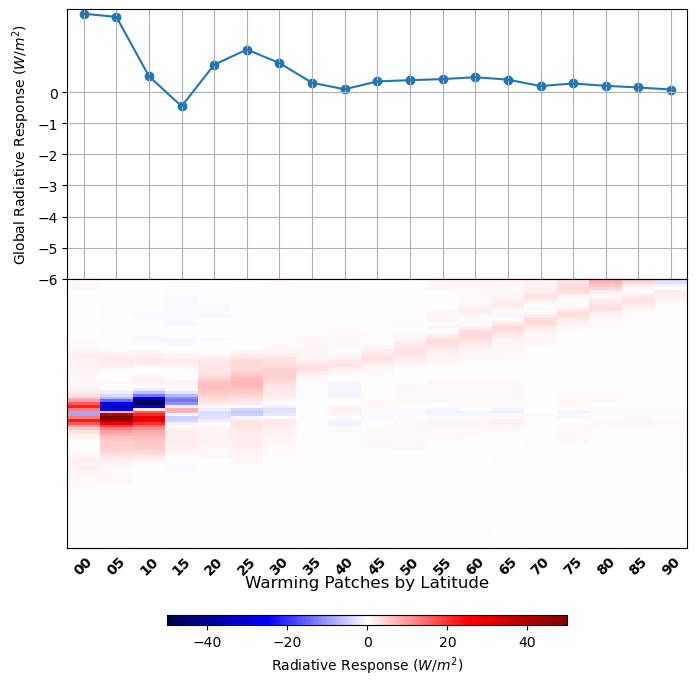

In [36]:
plt.rcParams['figure.figsize'] = [8,7]
fig = plt.figure()

gs = GridSpec(2, 19)
gs.update(wspace=0)

ax1 = fig.add_subplot(gs[0,:])
ax1.scatter(lats, dRw)
ax1.plot(lats, dRw)
ax1.set_xticks(lats, minor=False)
ax1.set_yticks([0,-1,-2,-3,-4,-5,-6], minor=False)
ax1.set_ylabel(r'Global Radiative Response ($W/m^2$)')
ax1.yaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='major')
ax1.set_xlim(-2.5,92.5)
ax1.grid(True)
for tick in ax1.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)

ax2 = fig.add_subplot(gs[1,0])
mesh_plot(ax2,xdim_00,toamesh_00,"00")
ax3 = fig.add_subplot(gs[1,1])
mesh_plot(ax3,xdim_05,toamesh_05,"05")
ax4 = fig.add_subplot(gs[1,2])
mesh_plot(ax4,xdim_10,toamesh_10,"10")
ax5 = fig.add_subplot(gs[1,3])
mesh_plot(ax5,xdim_15,toamesh_15,"15")
ax6 = fig.add_subplot(gs[1,4])
mesh_plot(ax6,xdim_20,toamesh_20,"20")
ax7 = fig.add_subplot(gs[1,5])
mesh_plot(ax7,xdim_25,toamesh_25,"25")
ax8 = fig.add_subplot(gs[1,6])
mesh_plot(ax8,xdim_30,toamesh_30,"30")
ax9 = fig.add_subplot(gs[1,7])
mesh_plot(ax9,xdim_35,toamesh_35,"35")
ax10 = fig.add_subplot(gs[1,8])
mesh_plot(ax10,xdim_40,toamesh_40,"40")
ax11 = fig.add_subplot(gs[1,9])
mesh_plot(ax11,xdim_45,toamesh_45,"45")
ax12 = fig.add_subplot(gs[1,10])
mesh_plot(ax12,xdim_50,toamesh_50,"50")
ax13 = fig.add_subplot(gs[1,11])
mesh_plot(ax13,xdim_55,toamesh_55,"55")
ax14 = fig.add_subplot(gs[1,12])
mesh_plot(ax14,xdim_60,toamesh_60,"60")
ax15 = fig.add_subplot(gs[1,13])
mesh_plot(ax15,xdim_65,toamesh_65,"65")
ax16 = fig.add_subplot(gs[1,14])
mesh_plot(ax16,xdim_70,toamesh_70,"70")
ax17 = fig.add_subplot(gs[1,15])
mesh_plot(ax17,xdim_75,toamesh_75,"75")
ax18 = fig.add_subplot(gs[1,16])
mesh_plot(ax18,xdim_80,toamesh_80,"80")
ax19 = fig.add_subplot(gs[1,17])
mesh_plot(ax19,xdim_85,toamesh_85,"85")
ax20 = fig.add_subplot(gs[1,18])
mappable = mesh_plot(ax20,xdim_90,toamesh_90,"90")

#ax21 = fig.add_subplot(gs[1,19])
#divider = make_axes_locatable(ax21)
#colorbar_axes = divider.append_axes("right",
##                                    size="100%",
 #                                   pad=0.05)
#cax = fig.add_axes([0.9,0.125,0.015,0.375])
fig.supxlabel('Warming Patches by Latitude', y=0.05)
cax = fig.add_axes([0.25,0,0.5,0.015])
plt.subplots_adjust(wspace=0, hspace=0.0)
cbar = fig.colorbar(mappable, cax=cax, orientation='horizontal')
cbar.ax.set_xlabel(r'Radiative Response ($W/m^2$)')
plt.show()

In [37]:
latlabels = ["00", "05", "10", "15", "20", "25", "30", "35", "40", "45", "50", "55", "60", "65", "70", "75", "80", "85", "90"]

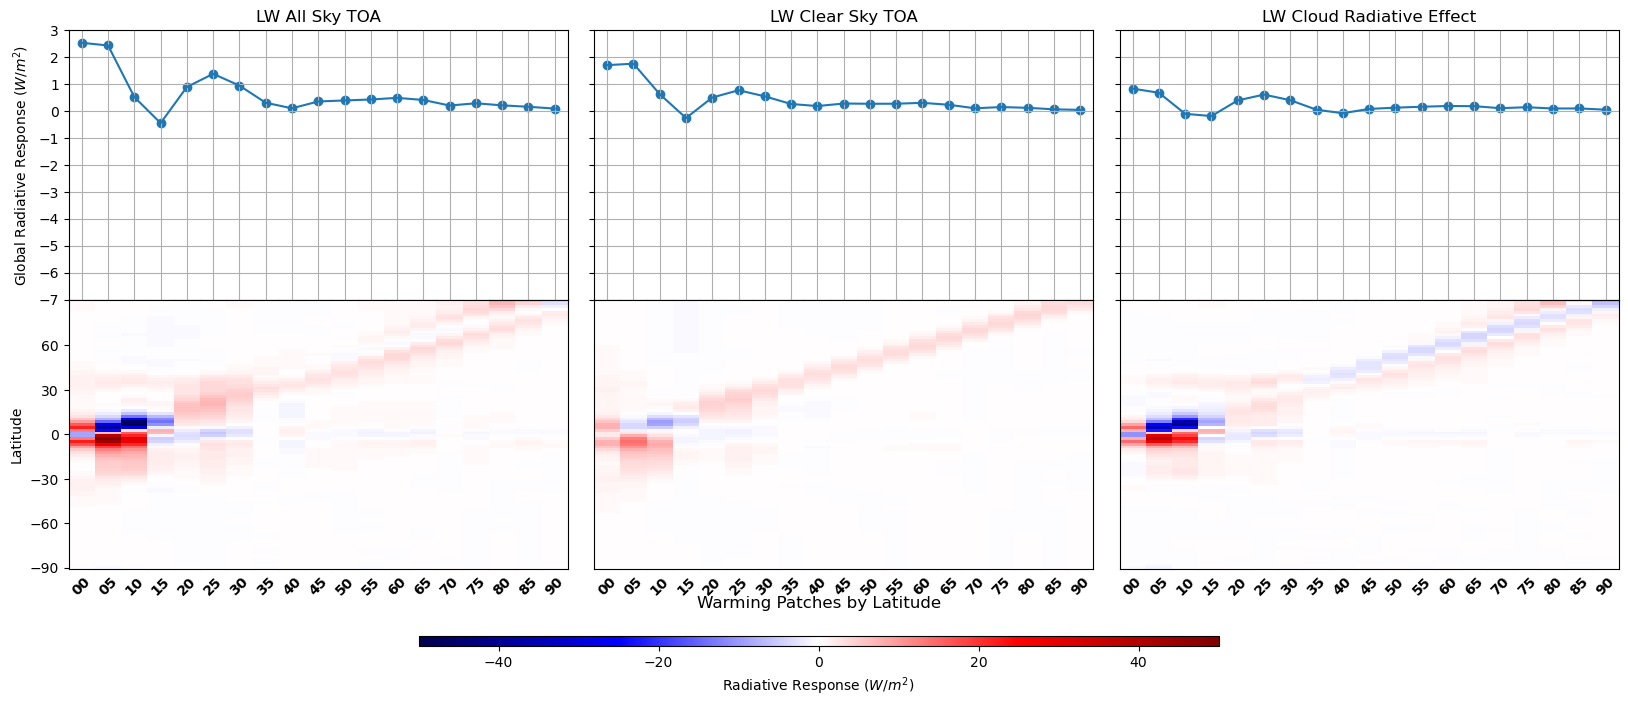

In [38]:
plt.rcParams['figure.figsize'] = [20,7]
fig = plt.figure()

gs = GridSpec(2, 59)
gs.update(wspace=0)

ax1 = fig.add_subplot(gs[0,:19])
ax1.scatter(lats, dRw)
ax1.plot(lats, dRw)
ax1.set_ylabel(r'Global Radiative Response ($W/m^2$)')
ax1.set_xticks(lats, minor=False)
ax1.set_yticks([3,2,1,0,-1,-2,-3,-4,-5,-6,-7], minor=False)
ax1.yaxis.grid(True, which='major')
ax1.xaxis.grid(True, which='major')
ax1.set_xlim(-2.5,92.5)
ax1.set_ylim(-7,3)
ax1.grid(True)
ax1.set_title('LW All Sky TOA')
for tick in ax1.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)

for num in range(0,19):
    ax = fig.add_subplot(gs[1,num])
    mesh_plot(ax,xdim_toa[num], mesh_toa[num], latlabels[num])

axempty1 = fig.add_subplot(gs[0,19])
axempty1.remove()

ax2 = fig.add_subplot(gs[0,20:39])    
ax2.scatter(lats, clr_list)
ax2.plot(lats, clr_list)
ax2.set_xticks(lats, minor=False)
ax2.set_yticks([3,2,1,0,-1,-2,-3,-4,-5,-6,-7], minor=False)
ax2.yaxis.grid(True, which='major')
ax2.xaxis.grid(True, which='major')
ax2.set_xlim(-2.5, 92.5)
ax2.set_ylim(-7,3)
ax2.grid(True)
ax2.set_title('LW Clear Sky TOA')
for tick in ax2.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)
for tick in ax2.yaxis.get_major_ticks():
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)
    
for num in range(20,39):
    ax = fig.add_subplot(gs[1,num])
    mesh_plot(ax, xdimclr[num-20], clrmesh[num-20], latlabels[num-20])
    
axempty2 = fig.add_subplot(gs[0,39])
axempty2.remove()

ax3 = fig.add_subplot(gs[0,40:])
ax3.scatter(lats, cre_list)
ax3.plot(lats, cre_list)
ax3.set_xticks(lats, minor=False)
ax3.set_yticks([3,2,1,0,-1,-2,-3,-4,-5,-6,-7], minor=False)
ax3.yaxis.grid(True, which='major')
ax3.xaxis.grid(True, which='major')
ax3.set_xlim(-2.5, 92.5)
ax3.set_ylim(-7,3)
ax3.grid(True)
ax3.set_title('LW Cloud Radiative Effect')
for tick in ax3.xaxis.get_major_ticks():
    tick.tick1line.set_visible(False)
    tick.tick2line.set_visible(False)
    tick.label1.set_visible(False)
    tick.label2.set_visible(False)
for tick in ax3.yaxis.get_major_ticks():
#     tick.tick1line.set_visible(False)
#     tick.tick2line.set_visible(False)
     tick.label1.set_visible(False)
     tick.label2.set_visible(False)    
    
for num in range(40,59):
    ax = fig.add_subplot(gs[1,num])
    mappable = mesh_plot(ax, xdimmesh[num-40], cremesh[num-40], latlabels[num-40])

fig.supxlabel('Warming Patches by Latitude', y=0.05)
cax = fig.add_axes([0.3,0,0.4,0.015])
plt.subplots_adjust(wspace=0, hspace=0.0)
cbar = fig.colorbar(mappable, cax=cax, orientation='horizontal')
cbar.ax.set_xlabel(r'Radiative Response ($W/m^2$)')
plt.show()